In [1]:
def mfreqz(b,a, Fs):
    ##Compute frequency response of the filter using signal.freqz function

     ### START CODE HERE ### (≈ 1 line of code) 

    wz, hz =signal.freqz(b,a)

    ##Calculate Magnitude from hz in dB

    Mag=20*np.log10(abs(hz)) ### START CODE HERE ### (≈ 1 line of code) 

    ##Calculate phase angle in degree from hz
    Phase =np.unwrap(np.arctan2(np.imag(hz), np.real(hz)))*(180/np.pi)### START CODE HERE ### (≈ 1 line of code) 

    ##Calculate frequency in Hz from wz
    Freq =wz*Fs/(2*np.pi) ### START CODE HERE ### (≈ 1 line of code) 

    ##Plot filter magnitude and phase responses using subplot. 
    fig = plt.figure(figsize=(10, 6))
    
    ##Plot Magnitude response
    sub1 = plt.subplot(2, 1, 1)
    sub1.plot(Freq,Mag, 'r', linewidth=2)  
    sub1.axis([1, Fs/2, -100, 5])
    sub1.set_title('Magnitute Response', fontsize=20)
    sub1.set_xlabel('Frequency [Hz]', fontsize=20)
    sub1.set_ylabel('Magnitude [dB]', fontsize=20)
    sub1.grid()

    ##Plot phase angle
    sub2 = plt.subplot(2, 1, 2)
    sub2.plot(Freq, Phase, 'g', linewidth=2)
    sub2.set_ylabel('Phase (degree)', fontsize=20)
    sub2.set_xlabel(r'Frequency (Hz)', fontsize=20)
    sub2.set_title(r'Phase response', fontsize=20)
    sub2.grid()

    plt.subplots_adjust(hspace=0.5)
    fig.tight_layout()
    plt.show()

In [2]:
##Define impz(b,a) to calculate impulse response and step response of a system
##input: b= an array containing numerator coefficients,a= an array containing denominator coefficients
def impz(b,a):
    ##Define the impulse sequence of length 60
    impulse = np.repeat(0.,60)
    impulse[0] =1.
    x = np.arange(0,60)

    ##Compute the impulse response 
    response =signal.lfilter(b, a, impulse)### START CODE HERE ### (≈ 1 line of code)  

    ##Plot filter impulse and step response: 
    fig = plt.figure(figsize=(10, 6))
    plt.subplot(211)
    plt.stem(x, response, 'm',use_line_collection=True)
    plt.ylabel('Amplitude', fontsize=15)
    plt.xlabel(r'n (samples)', fontsize=15)
    plt.title(r'Impulse response', fontsize=15)
    
    plt.subplot(212)
    step = np.cumsum(response)    ##Compute step response of the system
    plt.stem(x, step, 'g',use_line_collection=True)
    plt.ylabel('Amplitude', fontsize=15)
    plt.xlabel(r'n (samples)', fontsize=15)
    plt.title(r'Step response', fontsize=15)
    plt.subplots_adjust(hspace=0.5)
    
    fig.tight_layout()
    plt.show()

In [3]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


In [4]:
Fs,fp,fs,Ap,As=map(int,input().split()) ##Sampling frequency in Hz,Pass band frequency in Hz,Stop Band frequency in Hz,Pass band ripple in dB,Stop band attenuation in dB


8000 2000 500 3 20


In [5]:
##Compute Sampling parameter
Td=1/Fs

In [6]:
##Compute cut-off frequency in radian/sec
wp=2*np.pi*fp       ##pass band frequency in radian/sec
ws=2*np.pi*fs       ##stop band frequency in radian/sec

In [7]:
##Prewarp the analog frequency
Omega_p=(2/Td)*np.tan(wp*Td/2)  ##Prewarped analog passband frequency
Omega_s=(2/Td)*np.tan(ws*Td/2)   ##Prewarped analog stopband frequency

In [8]:
##Compute Butterworth filter order and cutoff frequency
N, wc=signal.buttord(Omega_p, Omega_s, Ap, As, analog=True)### START CODE HERE ### (≈ 1 line of code) 

##Print the values of order and cut-off frequency
print('Order of the filter=', N)
print('Cut-off frequency=', wc)

Order of the filter= 2
Cut-off frequency= 15981.015498034276


In [9]:
##Design analog Butterworth filter using N and wc by signal.butter function
b, a=signal.butter(N, wc, 'high',analog=True) ### START CODE HERE ### (≈ 1 line of code) 

##Perform bilinear Transformation
z, p=signal.bilinear(b,a,fs=Fs) ### START CODE HERE ### (≈ 1 line of code) 

##Print numerator and denomerator coefficients of the filter
print('Numerator Coefficients:', z)
print('Denominator Coefficients:', p)

Numerator Coefficients: [ 0.29324104 -0.58648208  0.29324104]
Denominator Coefficients: [ 1.         -0.00139093  0.17157322]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


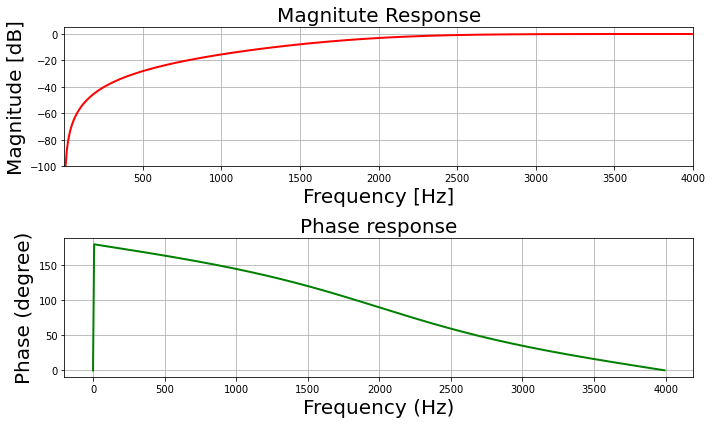

In [10]:
##Call mfreqz function to plot the magnitude and phase response

mfreqz(z,p,Fs)

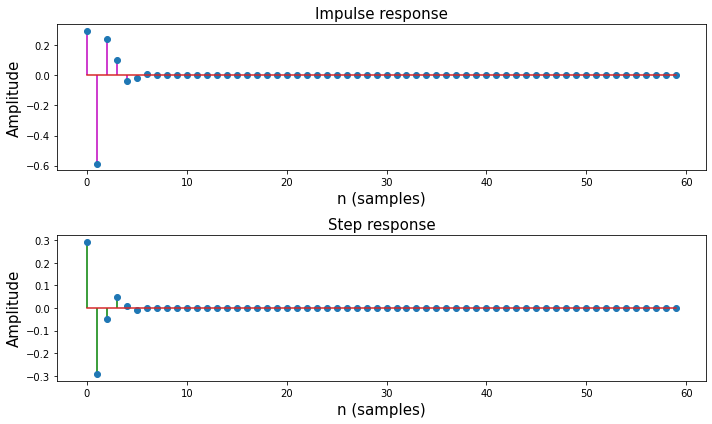

In [11]:
##Call impz function to plot impulse and step response of the filter

impz(z,p)